### 한국 복지 패널 데이터
- 국가나 지자체 단위로 조사되는 데이터는 대부분 정부에서 운영하는 공공데이터 포털이나 지자체가 운영하는 공공데이터 사이트에서 제공하고 있다.
- 국가 단위 데이터는 구글에서 공공데이터 포털로 검색하시면 나오는 공공데이터 포털 사이트에서 구하시면 됩니다.
- 지자체 단위 데이터는 지역이름 공공데이터로 검색하시면 나오는 지자체 공공데이터사이트에서 구하시면 됩니다.
- 연구소, 기업등에서 공개하는 있는 데이터들도 있습니다.
- 한국 복지 패널 데이터 데이터는 서울대 사회연구소와 정부와 같이 매년 대한민국의 가구들을 설문조사 방식으로 조사해서 공개하고 있는 데이터.

### 데이터 유형
- 대부분 csv, 엑셀, open api 형식으로 제공하고 있다.
- 일부는 spss, sas와 같은 통계 소프트웨어서 사용하고 있는 방식으로 제공하고 있기도 합니다.
- 파이썬은 spss, sas 통계 도구의 데이터를 지워하고 있다.

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈 
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형 회귀 은닉층으로 전달하기 전에
# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동한 학습이 진행될 수 있도록 한다.
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM



# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence



# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 데이터를 읽어온다.

In [2]:
!pip install pyreadstat

In [3]:
df100 = pd.read_spss('./data/Koweps_hpc16_2021_beta1.sav')
df100

,h16_id,h16_ind,h16_sn,h16_merkey,h_new,h16_cobf,p16_wgl,p16_wsl,p16_wsc,p16_wgc,...,c1607_4aq19,c1607_4aq20,c1607_4aq21,c1607_4aq22,c1607_4aq23,h16_pers_income1,h16_pers_income2,h16_pers_income3,h16_pers_income4,h16_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,1268.732029,0.258472,0.258472,1268.732029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,1692.852668,0.344876,0.344876,1692.852668,...,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,1147.135194,0.233700,0.233277,1145.058871,...,NaN,NaN,NaN,NaN,NaN,NaN,621.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,2648.283427,0.539522,0.535139,2626.772554,...,NaN,NaN,NaN,NaN,NaN,4392.0,NaN,NaN,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,4602.998190,0.937746,0.937746,4602.998190,...,NaN,NaN,NaN,NaN,NaN,NaN,1330.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,9794.0,7.0,1.0,97940701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,0.0,NaN
13140,9795.0,7.0,1.0,97950701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13141,9796.0,7.0,1.0,97960701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13142,9796.0,7.0,1.0,97960701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,500.0


In [4]:
# 데이터 프레임 정보 확인
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13144 entries, 0 to 13143
Columns: 1044 entries, h16_id to h16_pers_income5
dtypes: float64(1041), object(3)
memory usage: 104.7+ MB


In [5]:
# 결측치 확인
df100.isna().sum()

h16_id                  0
h16_ind                 0
h16_sn                  0
h16_merkey              0
h_new                   0
                    ...  
h16_pers_income1    10639
h16_pers_income2     9960
h16_pers_income3    12243
h16_pers_income4        0
h16_pers_income5    12487
Length: 1044, dtype: int64

### 사용할 데이터
- h16_g3 : 성별, 남자(1), 여자(2), 모름/무응답(9)
- h16_g4 : 태어난 년도, 0 ~ 9998, 모름/무응답(9999)
- h16_g10 : 혼인상태, 비해당,18세미만(0), 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼, 18세 이상, 미혼모 포함(5), 기타,사망 등(6), 모름/무응답(9)
- h16_g11 : 종교, 있음(1), 없음(2), 모름/무응답(9)
- h16_eco9 : 직종, 직종 코드표 참조, 모름/무응답(9999)
- p1602_8aq1 : 일을 한 달의 월 평균 임금, 0 ~ 9998, 모름/무응답(9999)
- h16_reg7 : 7개 권역별 지역 구분. 서울(1), 수도권(인천/경기)(2), 부산/경남/울산(3), 대구/경북(4), 대전/충남(5), 강원/충북(6), 광주/전남/전북/제주도(7)

### 필요한 데이터만 가져온다.

In [6]:
a1 = ['h16_g3', 'h16_g4', 'h16_g10', 'h16_g11', 'h16_eco9', 
      'p1602_8aq1', 'h16_reg7']
df2 = df100[a1]
df2

,h16_g3,h16_g4,h16_g10,h16_g11,h16_eco9,p1602_8aq1,h16_reg7
0,2.0,1945.0,2.0,2.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,942.0,165.0,1.0
2,1.0,1942.0,3.0,1.0,762.0,NaN,1.0
3,1.0,1962.0,1.0,1.0,855.0,366.0,1.0
4,2.0,1963.0,1.0,1.0,399.0,190.0,1.0
...,...,...,...,...,...,...,...
13139,2.0,1947.0,2.0,2.0,NaN,NaN,6.0
13140,2.0,1947.0,2.0,2.0,NaN,NaN,6.0
13141,1.0,1933.0,1.0,2.0,NaN,NaN,6.0
13142,2.0,1936.0,1.0,2.0,611.0,NaN,6.0


In [7]:
# 컬럼 이름 변경
df2.columns = ['성별', '태어난년도', '혼인상태', '종교유무', '직종',
              '일한달의평균임금', '7개권역']
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역
0,2.0,1945.0,2.0,2.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,942.0,165.0,1.0
2,1.0,1942.0,3.0,1.0,762.0,NaN,1.0
3,1.0,1962.0,1.0,1.0,855.0,366.0,1.0
4,2.0,1963.0,1.0,1.0,399.0,190.0,1.0
...,...,...,...,...,...,...,...
13139,2.0,1947.0,2.0,2.0,NaN,NaN,6.0
13140,2.0,1947.0,2.0,2.0,NaN,NaN,6.0
13141,1.0,1933.0,1.0,2.0,NaN,NaN,6.0
13142,2.0,1936.0,1.0,2.0,611.0,NaN,6.0


In [8]:
# 결측치
df2.isna().sum()

성별             0
태어난년도          0
혼인상태           0
종교유무           0
직종          6780
일한달의평균임금    8831
7개권역           0
dtype: int64

In [9]:
# 성별 이상치 확인
df2['성별'].value_counts()

2.0    7219
1.0    5925
Name: 성별, dtype: int64

In [10]:
# 내어난 년도 이상치 확인
df2['태어난년도'].agg(['min', 'max'])

min    1907.0
max    2020.0
Name: 태어난년도, dtype: float64

In [11]:
# 혼인상태에 대한 이상치 확인
df2['혼인상태'].value_counts()

1.0    6547
5.0    2246
2.0    1849
0.0    1736
3.0     687
4.0      63
6.0      16
Name: 혼인상태, dtype: int64

In [12]:
# 종교 유무에 대한 이상치 확인
df2['종교유무'].value_counts()

2.0    7476
1.0    5668
Name: 종교유무, dtype: int64

In [13]:
# 직종에 대한 이상치 확인
# 직종은 카테고리형 데이터이다.
# 4자리로 구성되어 있고 종류가 굉장히 많다.
a1 = df2['직종'].value_counts()

a1.sort_index(inplace=True)

for a2 in a1.index :
    print(a2)

111.0
112.0
121.0
122.0
131.0
132.0
133.0
134.0
135.0
139.0
141.0
149.0
151.0
152.0
153.0
159.0
211.0
213.0
221.0
222.0
223.0
224.0
225.0
231.0
232.0
233.0
234.0
235.0
236.0
237.0
238.0
239.0
241.0
242.0
243.0
244.0
245.0
246.0
247.0
248.0
251.0
252.0
253.0
254.0
259.0
261.0
271.0
272.0
273.0
274.0
281.0
282.0
283.0
284.0
285.0
286.0
288.0
311.0
312.0
313.0
314.0
320.0
330.0
391.0
392.0
399.0
411.0
412.0
421.0
422.0
429.0
431.0
432.0
441.0
442.0
510.0
521.0
522.0
531.0
532.0
611.0
612.0
613.0
620.0
630.0
710.0
721.0
722.0
730.0
741.0
742.0
743.0
751.0
752.0
753.0
761.0
762.0
771.0
772.0
781.0
782.0
783.0
784.0
791.0
792.0
799.0
811.0
812.0
819.0
821.0
822.0
823.0
831.0
832.0
841.0
842.0
843.0
851.0
852.0
853.0
854.0
855.0
861.0
862.0
863.0
864.0
873.0
874.0
875.0
881.0
882.0
891.0
892.0
899.0
910.0
921.0
922.0
930.0
941.0
942.0
951.0
952.0
953.0
991.0
992.0
999.0
1001.0
1002.0
1009.0


In [14]:
# 권역에 대한 이상치 확인
df2['7개권역'].value_counts()

2.0    3018
7.0    2291
3.0    2233
1.0    1773
4.0    1555
5.0    1244
6.0    1030
Name: 7개권역, dtype: int64

이상치를 확인했더니 모두 정상적으로 데이터가 들어있다.

### 데이터 변환
- 숫자로 되어 있는 데이터를 원래의 값으로 변환한다.

In [15]:
m1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(m1)
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역
0,여자,1945.0,2.0,2.0,NaN,NaN,1.0
1,남자,1948.0,2.0,2.0,942.0,165.0,1.0
2,남자,1942.0,3.0,1.0,762.0,NaN,1.0
3,남자,1962.0,1.0,1.0,855.0,366.0,1.0
4,여자,1963.0,1.0,1.0,399.0,190.0,1.0
...,...,...,...,...,...,...,...
13139,여자,1947.0,2.0,2.0,NaN,NaN,6.0
13140,여자,1947.0,2.0,2.0,NaN,NaN,6.0
13141,남자,1933.0,1.0,2.0,NaN,NaN,6.0
13142,여자,1936.0,1.0,2.0,611.0,NaN,6.0


In [16]:
m1 = {
    0 : '비해당(18세미만)',
    1 : '유배우',
    2 : '사별',
    3 : '이혼',
    4 : '별거',
    5 : '미혼(18세이상, 미혼모포함)',
    6 : '기타/사망'
}

df2['혼인상태'] = df2['혼인상태'].map(m1)
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역
0,여자,1945.0,사별,2.0,NaN,NaN,1.0
1,남자,1948.0,사별,2.0,942.0,165.0,1.0
2,남자,1942.0,이혼,1.0,762.0,NaN,1.0
3,남자,1962.0,유배우,1.0,855.0,366.0,1.0
4,여자,1963.0,유배우,1.0,399.0,190.0,1.0
...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,2.0,NaN,NaN,6.0
13140,여자,1947.0,사별,2.0,NaN,NaN,6.0
13141,남자,1933.0,유배우,2.0,NaN,NaN,6.0
13142,여자,1936.0,유배우,2.0,611.0,NaN,6.0


In [17]:
m1 = {
    1 : '있음',
    2 : '없음'
}

df2['종교유무'] = df2['종교유무'].map(m1)
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역
0,여자,1945.0,사별,없음,NaN,NaN,1.0
1,남자,1948.0,사별,없음,942.0,165.0,1.0
2,남자,1942.0,이혼,있음,762.0,NaN,1.0
3,남자,1962.0,유배우,있음,855.0,366.0,1.0
4,여자,1963.0,유배우,있음,399.0,190.0,1.0
...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,NaN,6.0
13140,여자,1947.0,사별,없음,NaN,NaN,6.0
13141,남자,1933.0,유배우,없음,NaN,NaN,6.0
13142,여자,1936.0,유배우,없음,611.0,NaN,6.0


In [18]:
a1 = df2['직종'] // 100

df2['직종임시'] = a1
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역,직종임시
0,여자,1945.0,사별,없음,NaN,NaN,1.0,NaN
1,남자,1948.0,사별,없음,942.0,165.0,1.0,9.0
2,남자,1942.0,이혼,있음,762.0,NaN,1.0,7.0
3,남자,1962.0,유배우,있음,855.0,366.0,1.0,8.0
4,여자,1963.0,유배우,있음,399.0,190.0,1.0,3.0
...,...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,NaN,6.0,NaN
13140,여자,1947.0,사별,없음,NaN,NaN,6.0,NaN
13141,남자,1933.0,유배우,없음,NaN,NaN,6.0,NaN
13142,여자,1936.0,유배우,없음,611.0,NaN,6.0,6.0


In [19]:
# 직종 대분류라는 컬럼을 추가한다.
df2['직종대분류'] = np.nan
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역,직종임시,직종대분류
0,여자,1945.0,사별,없음,NaN,NaN,1.0,NaN,NaN
1,남자,1948.0,사별,없음,942.0,165.0,1.0,9.0,NaN
2,남자,1942.0,이혼,있음,762.0,NaN,1.0,7.0,NaN
3,남자,1962.0,유배우,있음,855.0,366.0,1.0,8.0,NaN
4,여자,1963.0,유배우,있음,399.0,190.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,NaN,6.0,NaN,NaN
13140,여자,1947.0,사별,없음,NaN,NaN,6.0,NaN,NaN
13141,남자,1933.0,유배우,없음,NaN,NaN,6.0,NaN,NaN
13142,여자,1936.0,유배우,없음,611.0,NaN,6.0,6.0,NaN


In [20]:
idx1 = df2.query('직종임시 == 1').index
idx2 = df2.query('직종임시 == 2').index
idx3 = df2.query('직종임시 == 3').index
idx4 = df2.query('직종임시 == 4').index
idx5 = df2.query('직종임시 == 5').index
idx6 = df2.query('직종임시 == 6').index
idx7 = df2.query('직종임시 == 7').index
idx8 = df2.query('직종임시 == 8').index
idx9 = df2.query('직종임시 == 9').index
idx10 = df2.query('직종임시 == 10').index

In [21]:
df2.loc[idx1, '직종대분류'] = '관리자'
df2.loc[idx2, '직종대분류'] = '전문가 및 관련 종사자'
df2.loc[idx3, '직종대분류'] = '사무 종사자'
df2.loc[idx4, '직종대분류'] = '서비스 종사자'
df2.loc[idx5, '직종대분류'] = '판매 종사자'
df2.loc[idx6, '직종대분류'] = '농립, 어업 숙련 종사자'
df2.loc[idx7, '직종대분류'] = '기능원 및 관련 기능 종사자'
df2.loc[idx8, '직종대분류'] = '장치, 기계, 조작 및 조립 종사자'
df2.loc[idx9, '직종대분류'] = '단순노무 종사자'
df2.loc[idx10, '직종대분류'] = '군인'

In [22]:
df2['직종대분류'].value_counts()

단순노무 종사자               1326
전문가 및 관련 종사자            920
농립, 어업 숙련 종사자           914
사무 종사자                  854
서비스 종사자                 637
장치, 기계, 조작 및 조립 종사자     515
판매 종사자                  492
기능원 및 관련 기능 종사자         488
관리자                     196
군인                       22
Name: 직종대분류, dtype: int64

In [23]:
m1 = {
    1 : '서울',
    2 : '수도권(인천/경기)',
    3 : '부산/경남/울산',
    4 : '대구/경북',
    5 : '대전/충남',
    6 : '강원/충북',
    7 : '광주/전남/전북/제주도'
}

df2['7개권역'] = df2['7개권역'].map(m1)
df2

,성별,태어난년도,혼인상태,종교유무,직종,일한달의평균임금,7개권역,직종임시,직종대분류
0,여자,1945.0,사별,없음,NaN,NaN,서울,NaN,NaN
1,남자,1948.0,사별,없음,942.0,165.0,서울,9.0,단순노무 종사자
2,남자,1942.0,이혼,있음,762.0,NaN,서울,7.0,기능원 및 관련 기능 종사자
3,남자,1962.0,유배우,있음,855.0,366.0,서울,8.0,"장치, 기계, 조작 및 조립 종사자"
4,여자,1963.0,유배우,있음,399.0,190.0,서울,3.0,사무 종사자
...,...,...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,NaN,강원/충북,NaN,NaN
13140,여자,1947.0,사별,없음,NaN,NaN,강원/충북,NaN,NaN
13141,남자,1933.0,유배우,없음,NaN,NaN,강원/충북,NaN,NaN
13142,여자,1936.0,유배우,없음,611.0,NaN,강원/충북,6.0,"농립, 어업 숙련 종사자"


In [24]:
# 불필요한 컬럼을 제거한다.
df2.drop(['직종', '직종임시'], axis=1, inplace=True)
df2

,성별,태어난년도,혼인상태,종교유무,일한달의평균임금,7개권역,직종대분류
0,여자,1945.0,사별,없음,NaN,서울,NaN
1,남자,1948.0,사별,없음,165.0,서울,단순노무 종사자
2,남자,1942.0,이혼,있음,NaN,서울,기능원 및 관련 기능 종사자
3,남자,1962.0,유배우,있음,366.0,서울,"장치, 기계, 조작 및 조립 종사자"
4,여자,1963.0,유배우,있음,190.0,서울,사무 종사자
...,...,...,...,...,...,...,...
13139,여자,1947.0,사별,없음,NaN,강원/충북,NaN
13140,여자,1947.0,사별,없음,NaN,강원/충북,NaN
13141,남자,1933.0,유배우,없음,NaN,강원/충북,NaN
13142,여자,1936.0,유배우,없음,NaN,강원/충북,"농립, 어업 숙련 종사자"


- 조사 대상에 대해 남자와 여자의 수를 구해 시각화한다.
- 1900년대에 태어난 사람과 2000년대에 태어난 사람의 수를 구해 시각화 한다.
- 연령대별(데이터는 2021년 데이터이므로 2021년을 기준으로 한다) 사람의 수를 구해 시각화 한다.
- 혼인상태에 대한 비율을 시각화 한다.
- 종교가 있는 사람들과 없는 사람들의 수를 구해 시각화한다.
- 일한 달의 평균 임금이 1000미만인 사람들의 수와 이상인 사람들의 수를 구해 시각화 한다.
- 각 권역별 사람의 수를 구해 시각화 한다.
- 직종 대분류별로 사람의 수를 구해 시각화 한다.
- 연령대별 평균 임금을 구해 시각화 한다.
- 연령별 평균 임금을 구해 시각화 한다.
- 종교 유무에 따른 이혼율을 시각화 한다.
- 각 권역별 평균 임금을 구해 시각화 한다.
- 직종 대분류별 평균 임금을 구해 시각화 한다.


### 조사 대상에 대해 남자와 여자의 수를 구해 시각화한다.

In [25]:
a1 = df2['성별'].value_counts()
a1

여자    7219
남자    5925
Name: 성별, dtype: int64

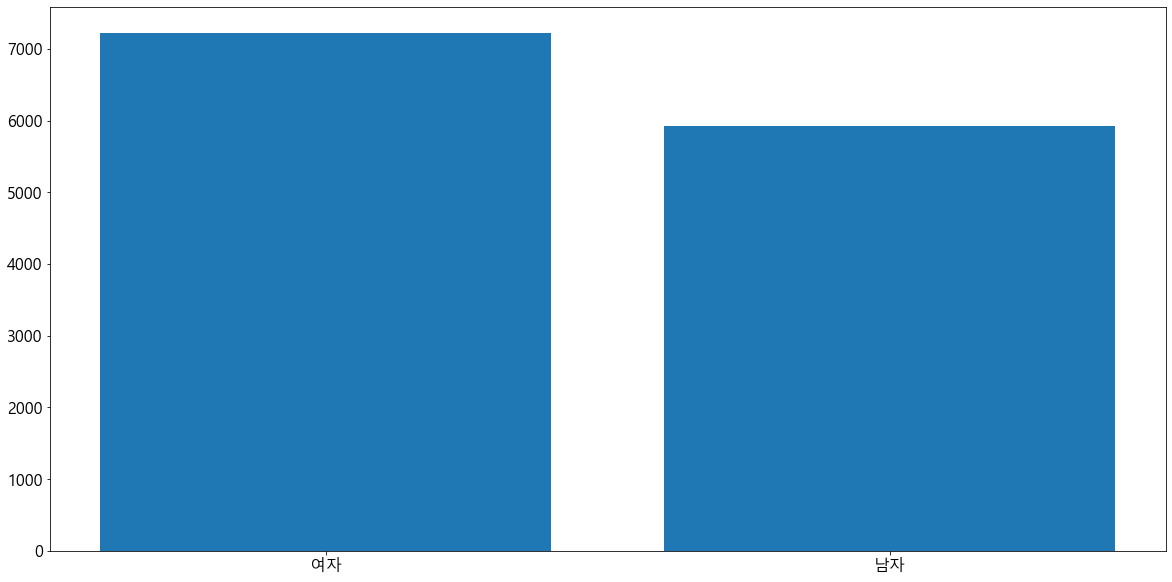

In [26]:
plt.bar(a1.index, a1.values)
plt.show()

In [27]:
# DataFrame으로 시각화
a1 = df2['성별'].value_counts()
a1

여자    7219
남자    5925
Name: 성별, dtype: int64

In [28]:
df100 = pd.DataFrame(a1)
df100

,성별
여자,7219
남자,5925


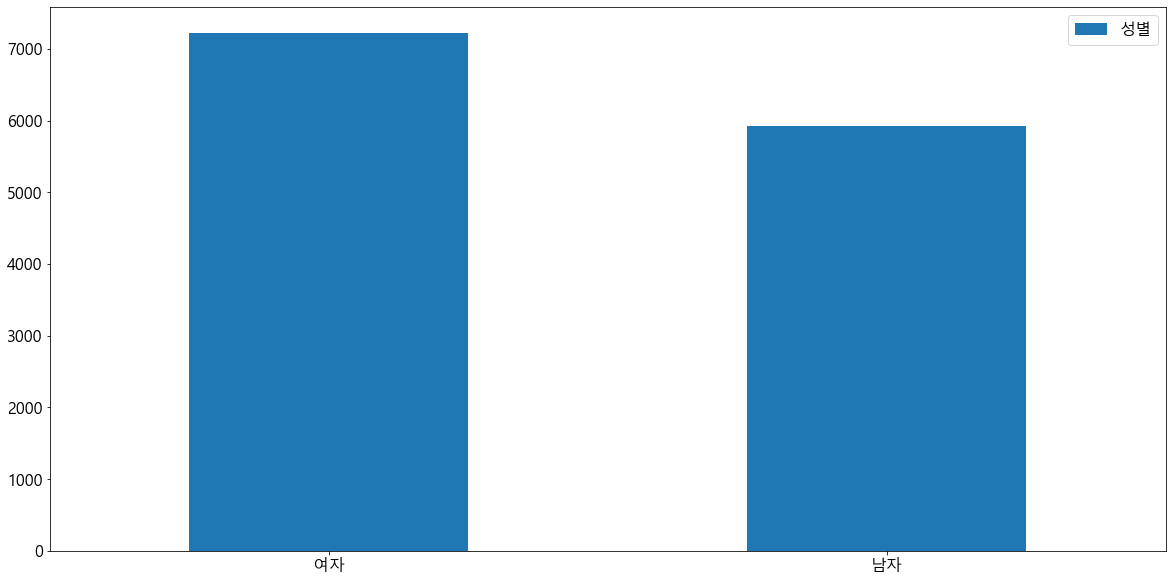

In [29]:
# 데이터 프레임의 행 하나가 막대 그래프 그룹 하나가 된다.
# 그룹간에는 떨어져서 그려진다.
# 행 하나에서 컬럼들 하나하나가 막대로 그려지며 같은 막대 그래프
# 그룹으로 묶이기 때운에 모두 붙어져서 나온다.
df100.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [30]:
a1 = df2['성별'].value_counts()
a1

여자    7219
남자    5925
Name: 성별, dtype: int64

In [31]:
a2 = pd.DataFrame(a1)
a2

,성별
여자,7219
남자,5925


In [32]:
a3 = a2.T
a3

,여자,남자
성별,7219,5925


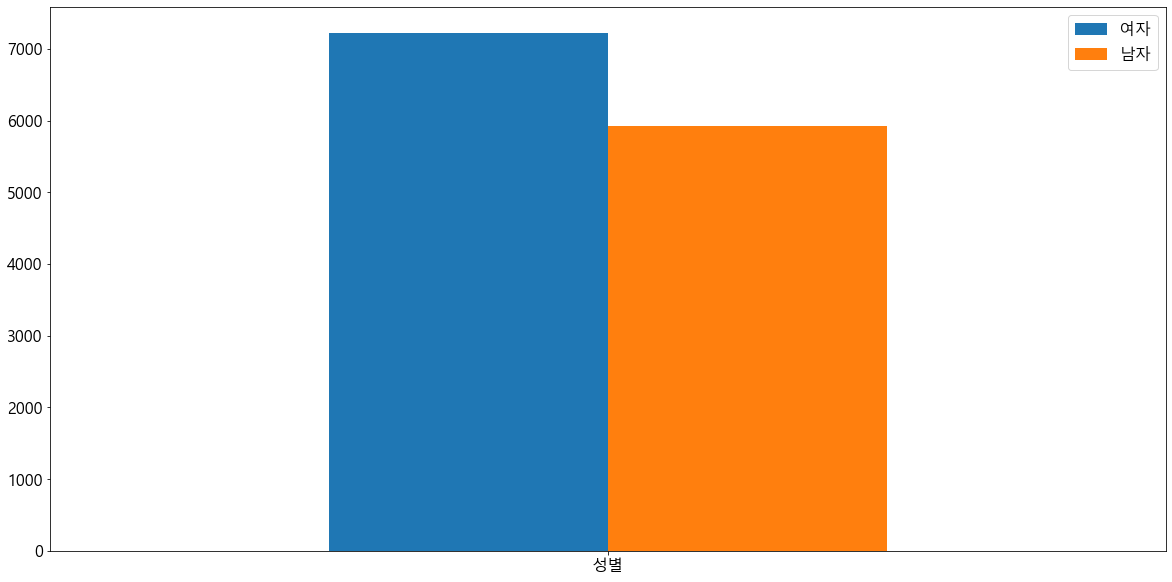

In [33]:
a3.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

,조사 대상의 수
여자,7219
남자,5925


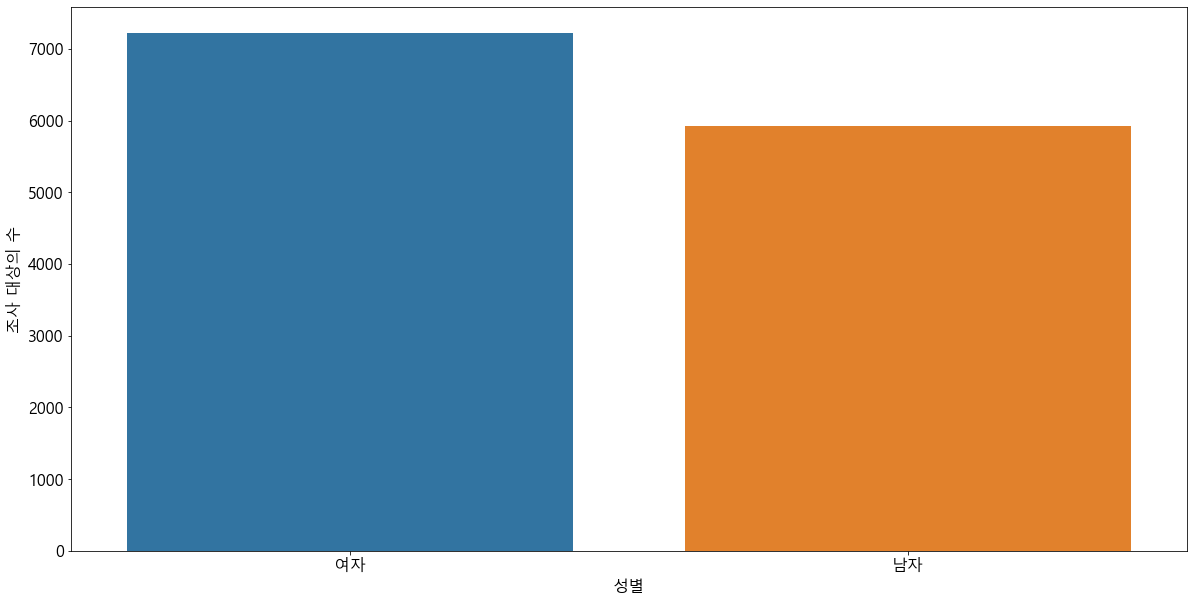

In [34]:
# seanborn
a1 = df2['성별'].value_counts()
a2 = pd.DataFrame(a1)
a2.columns = ['조사 대상의 수']
display(a2)
sns.countplot(data=df2, x='성별')
plt.ylabel('조사 대상의 수')
plt.show()

### 1900년대에 태어난 사람과 2000년대에 태어난 사람의 수를 구해 시각화 한다.

In [35]:
# 태어난 년도의 타입을 출력한다.
# 문자열이면 앞의 두 글자가 19와 20인 사람들을 가져오고
# 숫자면 1900이상 2000미만과 2000이상인 사람들을 가져와 수치를 구한다.
df2['태어난년도'].dtype

dtype('float64')

In [36]:
# 태어난 년도가 1900이상 2000미만인 사람들을 가져온다.
# idx1 = df2.query('태어난년도 >= 1900 and 태어난년도 < 2000').index
idx1 = df2.query('1900 <= 태어난년도 < 2000').index
temp_df1= df2.loc[idx1]

# 태어난 년도가 2000이상인 사람들을 가져온다.
idx2 = df2.query('태어난년도 >= 2000').index
temp_df2 = df2.loc[idx2]

In [37]:
# 1900년대에 태어난 사람들의 수를 구한다.
a1 = len(temp_df1)
# 2000년대에 태어난 사람들의 수를 구한다.
a2 = len(temp_df2)


print(f'1900년대에 태어난 사람들의 수 : {a1}')
print(f'2000년대에 태어난 사람들의 수 : {a2}')

1900년대에 태어난 사람들의 수 : 11008
2000년대에 태어난 사람들의 수 : 2136


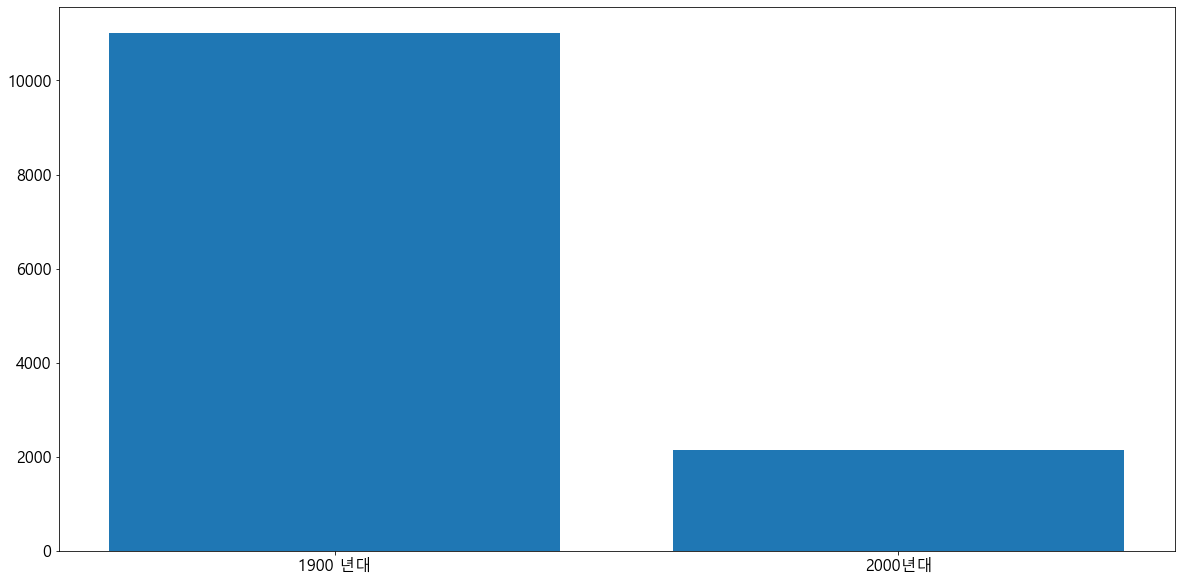

In [38]:
# matplotlib로 시각화한다.
x = ['1900 년대', '2000년대']
y = [a1, a2]
plt.bar(x, y)
plt.show()

In [39]:
# DataFarme
d1 = {
    '1900년대' : [a1],
    '2000년대' : [a2]
}
temp_df1 = pd.DataFrame(d1)
display(temp_df1)

,1900년대,2000년대
0,11008,2136


In [40]:
# DataFarme
d1 = {
    '인구수' : [a1, a2],
}
temp_df1 = pd.DataFrame(d1)
temp_df1.index = ['1900년대', '2000년대']
display(temp_df1)

,인구수
1900년대,11008
2000년대,2136


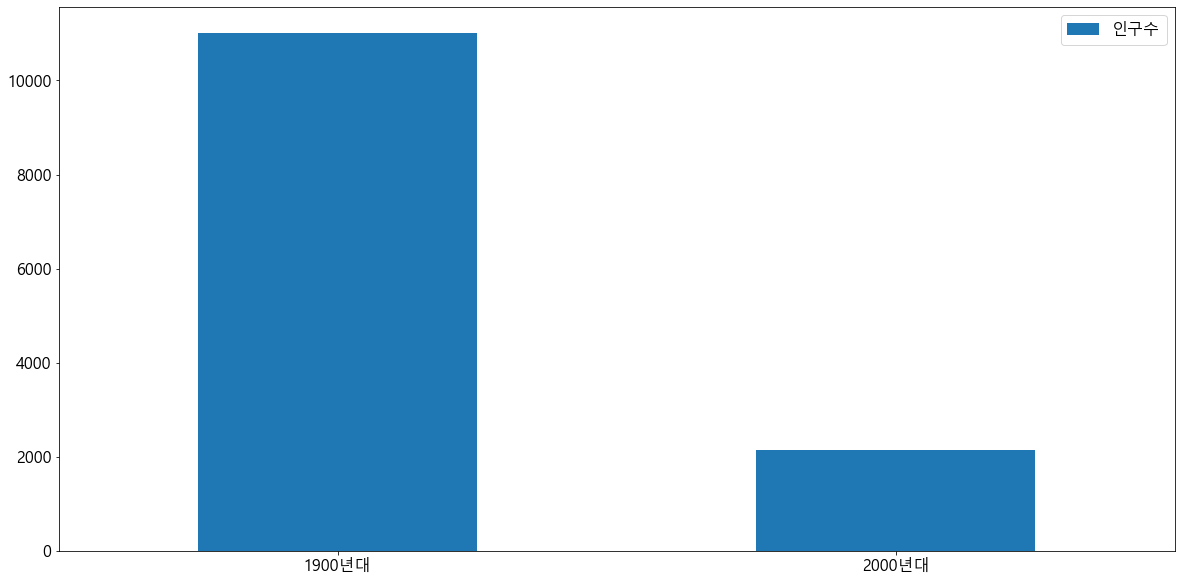

In [41]:
temp_df1.plot.bar()
plt.xticks(rotation=0)
plt.show()

In [42]:
# seaborn
# seaborn은 컬럼 이름을 지정하기 때문에 x축과 y축으로 들어갈 값들을
# 모두 컬럼으로 정의해줘야 한다.
d1 = {
    '년도' : ['1900년대', '2000년대'],
    '인구수' : [a1, a2]
}
temp_df1 = pd.DataFrame(d1)
temp_df1


,년도,인구수
0,1900년대,11008
1,2000년대,2136


### 연령대별(데이터는 2021년 데이터이므로 2021년을 기준으로 한다) 사람의 수를 구해 시각화 한다.

In [43]:
df2['나이'] = 2021 - df2['태어난년도'] +1
df2['나이']

0        77.0
1        74.0
2        80.0
3        60.0
4        59.0
         ... 
13139    75.0
13140    75.0
13141    89.0
13142    86.0
13143    88.0
Name: 나이, Length: 13144, dtype: float64

In [44]:
df2['연령대'] = df2['나이'] // 10 * 10
df2['연령대']

0        70.0
1        70.0
2        80.0
3        60.0
4        50.0
         ... 
13139    70.0
13140    70.0
13141    80.0
13142    80.0
13143    80.0
Name: 연령대, Length: 13144, dtype: float64

In [45]:
# matplotlib
a1 = df2['연령대'].value_counts()
a1.sort_index(inplace=True)
a1

0.0       582
10.0     1154
20.0     1257
30.0     1090
40.0     1617
50.0     1704
60.0     1768
70.0     1878
80.0     1813
90.0      268
100.0      12
110.0       1
Name: 연령대, dtype: int64

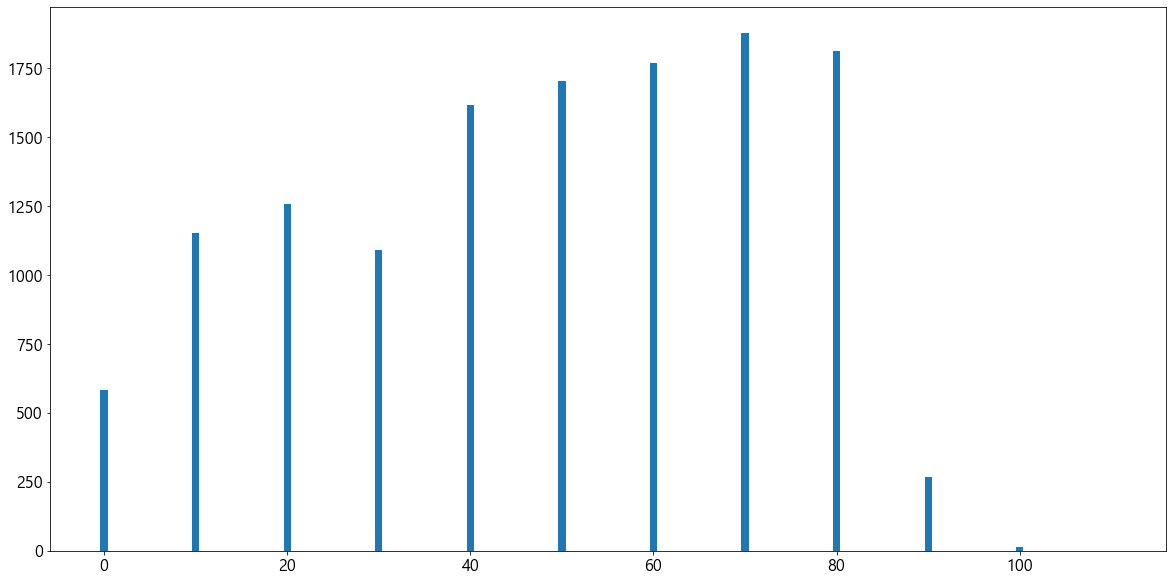

In [46]:
plt.bar(a1.index, a1.values)
plt.show()

In [47]:
# DataFrame
a1 = df2['연령대'].value_counts()
a1.sort_index(inplace=True)
temp_df1 = pd.DataFrame(a1)
temp_df1.columns = ['사람수']
temp_df1

,사람수
0.0,582
10.0,1154
20.0,1257
30.0,1090
40.0,1617
50.0,1704
60.0,1768
70.0,1878
80.0,1813
90.0,268


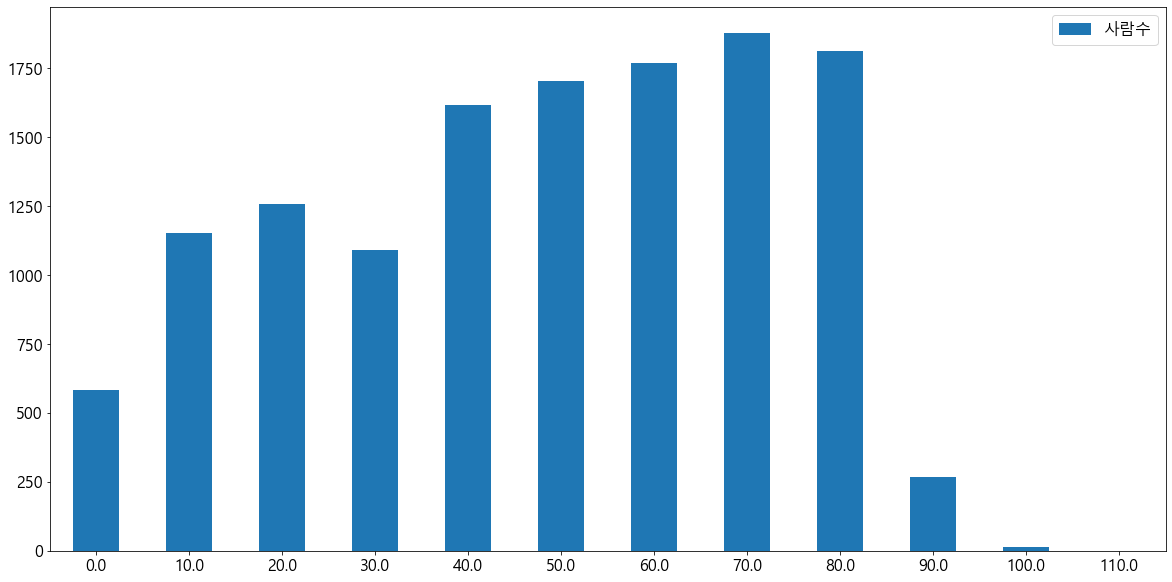

In [48]:
temp_df1.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

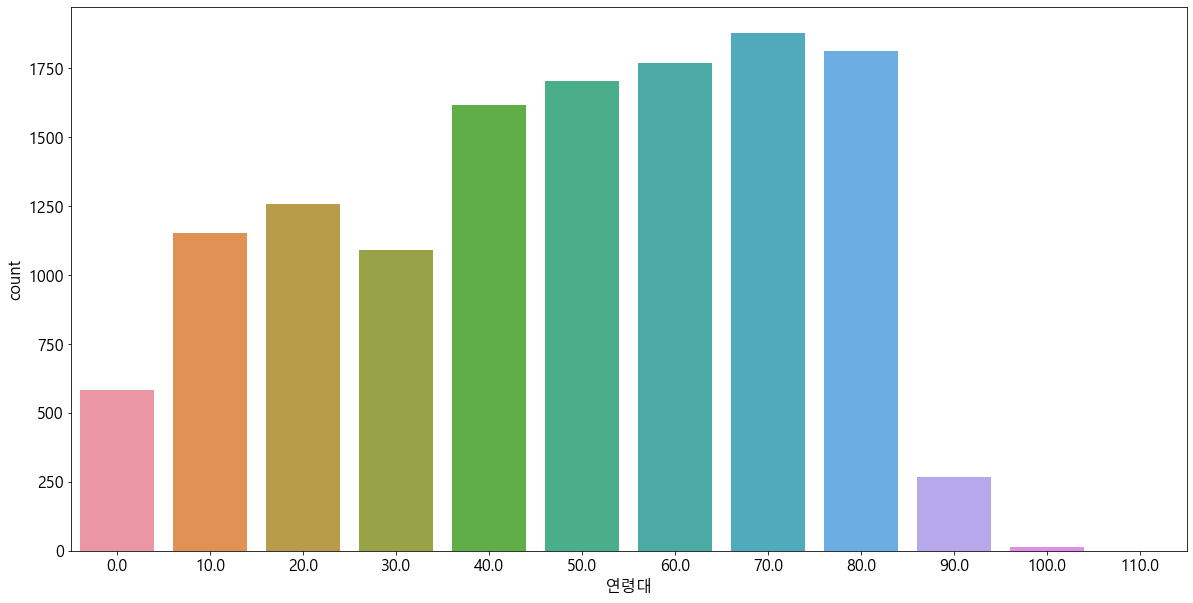

In [49]:
# seaborn
sns.countplot(data=df2, x='연령대')
plt.show()

### 혼인상태에 대한 비율을 시각화 한다.

In [50]:
# matplot
a1 = df2['혼인상태'].value_counts()
a1

유배우                 6547
미혼(18세이상, 미혼모포함)    2246
사별                  1849
비해당(18세미만)          1736
이혼                   687
별거                    63
기타/사망                 16
Name: 혼인상태, dtype: int64

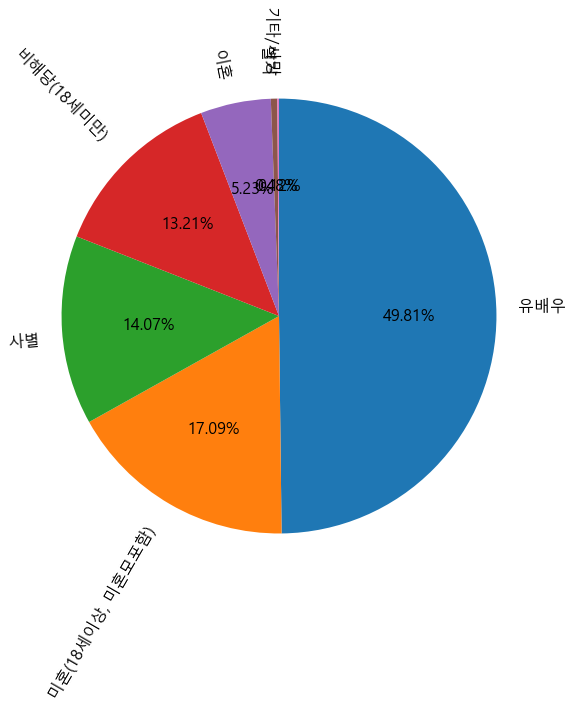

In [51]:
# 데이터
values = a1.values
# 파이의 이름
labels = a1.index

plt.pie(values, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%', rotatelabels=True, pctdistance=0.6)
plt.show()

### 종교가 있는 사람들과 없는 사람들의 수를 구해 시각화한다.

In [52]:
a1 = df2['종교유무'].value_counts()
temp_df1 = pd.DataFrame(a1)
temp_df1.columns = ['인구수']
temp_df1

,인구수
없음,7476
있음,5668


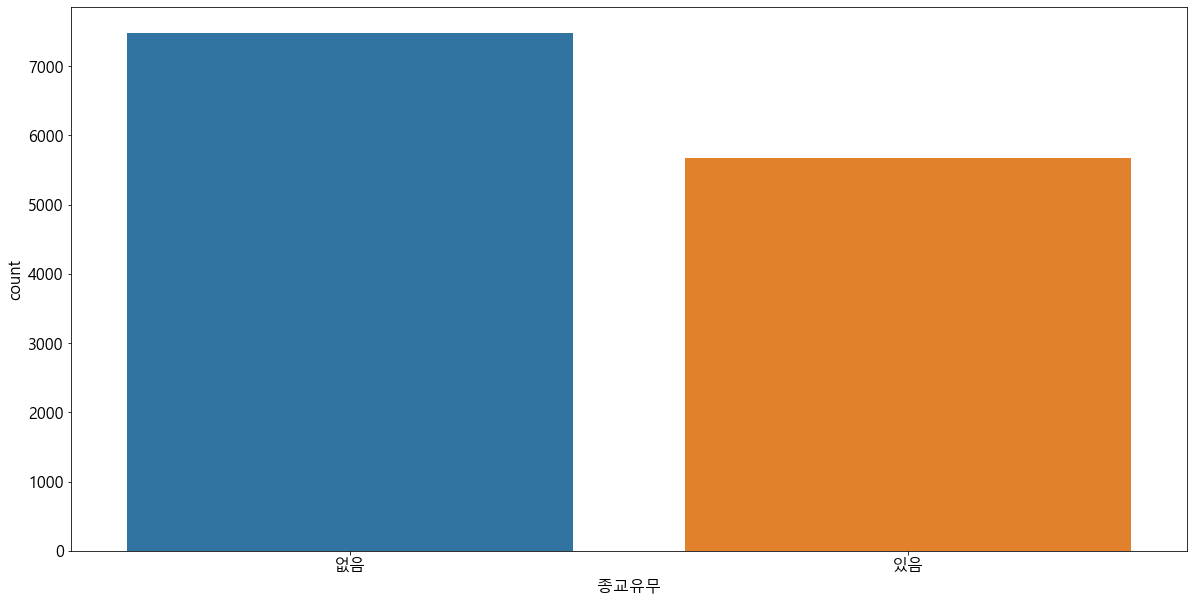

In [53]:
sns.countplot(data=df2, x='종교유무')
plt.show()

### 일한 달에 평균 임금이 1000미만인 사람들의 수와 이상인 사람들의 수를 구해 시각화 한다.

In [54]:
# 일한 달의 평균 임금이 1000만 미만인 사람들의 데이터를 가져온다.
temp_df1 = df2.query('일한달의평균임금 < 1000')
# 일한 달의 평균 임금이 1000만 이상인 사람들의 데이터를 가져온다.
temp_df2 = df2.query('일한달의평균임금 >= 1000')

In [55]:
a1 = len(temp_df1)
a2 = len(temp_df2)

print(f'1000만 미만 : {a1}')
print(f'1000만 이상 : {a2}')

1000만 미만 : 4271
1000만 이상 : 42


In [56]:
d1 = {
    '일한 달의 평균 임금' : ['1000만 미만', '1000만 이상'],
    '사람수' : [a1, a2]
}
temp_df3 = pd.DataFrame(d1)
temp_df3

,일한 달의 평균 임금,사람수
0,1000만 미만,4271
1,1000만 이상,42


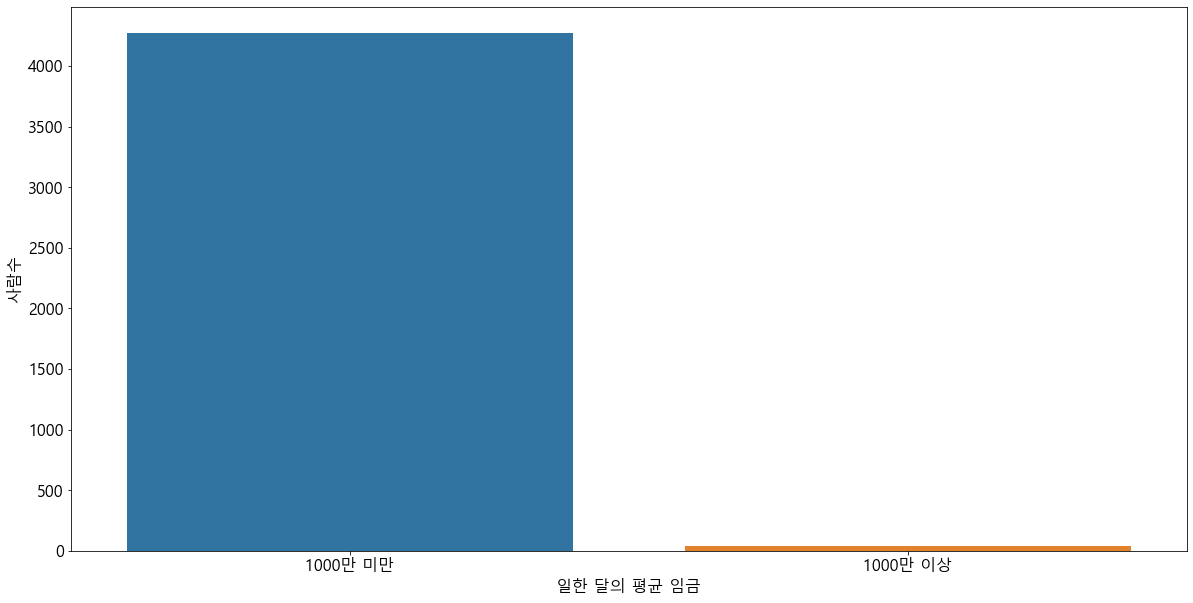

In [57]:
sns.barplot(data=temp_df3, x='일한 달의 평균 임금', y='사람수')
plt.show()

### 각 권역별 사람의 수를 구해 시각화 한다.

In [58]:
# 권역별 사람의 수를 구한다.
a1 = df2['7개권역'].value_counts()
a1

수도권(인천/경기)      3018
광주/전남/전북/제주도    2291
부산/경남/울산        2233
서울              1773
대구/경북           1555
대전/충남           1244
강원/충북           1030
Name: 7개권역, dtype: int64

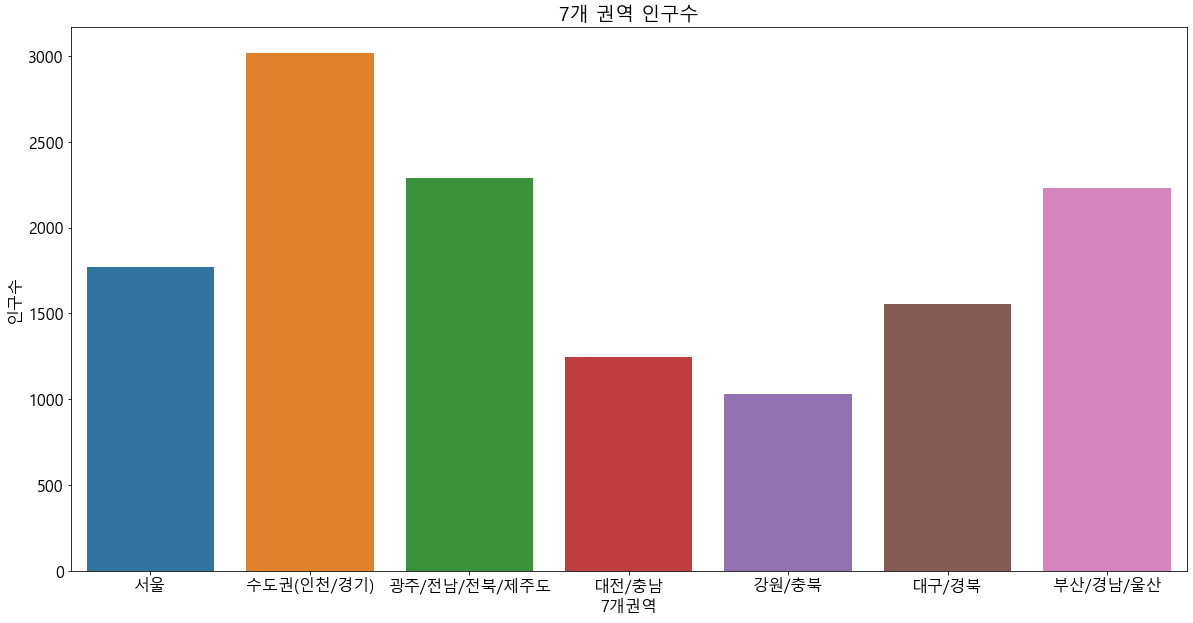

In [59]:
# 시각화
sns.countplot(data=df2, x='7개권역')
plt.title('7개 권역 인구수')
plt.ylabel('인구수')
plt.xticks(rotation=0)
plt.show()

### 직종 대분류별로 사람의 수를 구해 시각화 한다.


In [60]:
df2['직종대분류'].value_counts()

단순노무 종사자               1326
전문가 및 관련 종사자            920
농립, 어업 숙련 종사자           914
사무 종사자                  854
서비스 종사자                 637
장치, 기계, 조작 및 조립 종사자     515
판매 종사자                  492
기능원 및 관련 기능 종사자         488
관리자                     196
군인                       22
Name: 직종대분류, dtype: int64

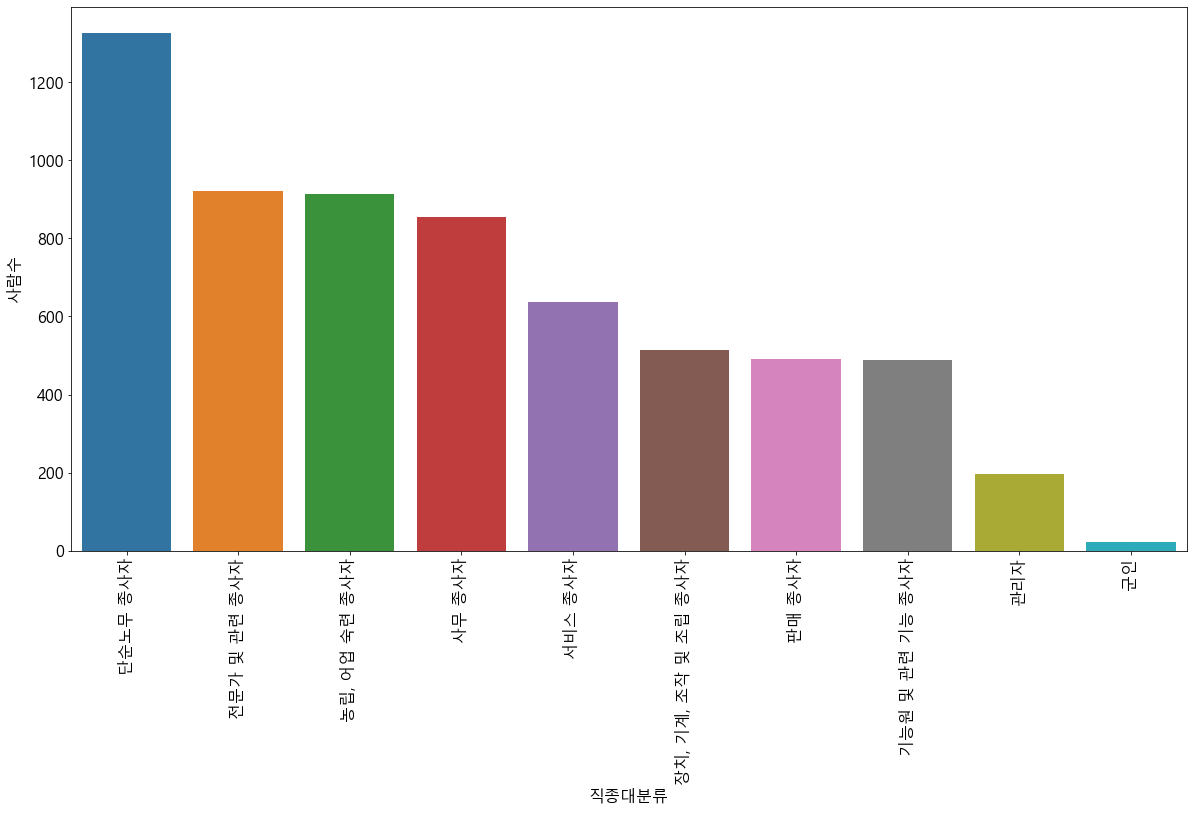

In [61]:
idx = df2['직종대분류'].value_counts().index
sns.countplot(data=df2, x='직종대분류', order=idx)
plt.ylabel('사람수')
plt.xticks(rotation=90)
plt.show()

### 연령대별 평균 임금을 구해 시각화 한다.


In [62]:
# 연령대와 일한달의 평균 임금을 가져온다.
a1 = df2[['연령대', '일한달의평균임금']]
a1

,연령대,일한달의평균임금
0,70.0,NaN
1,70.0,165.0
2,80.0,NaN
3,60.0,366.0
4,50.0,190.0
...,...,...
13139,70.0,NaN
13140,70.0,NaN
13141,80.0,NaN
13142,80.0,NaN


In [63]:
# 연령대로 그룹 묶고 평균 임금을 구한다.
a2 = a1.groupby('연령대').mean()
a2

,일한달의평균임금
연령대,
0.0,NaN
10.0,NaN
20.0,213.234513
30.0,306.410326
40.0,373.382122
50.0,357.914255
60.0,242.562604
70.0,96.383523
80.0,38.403756


In [64]:
# 계산된 결과의 결측치는 0으로 채워준다.
a2.fillna(0, inplace=True)
a2

,일한달의평균임금
연령대,
0.0,0.000000
10.0,0.000000
20.0,213.234513
30.0,306.410326
40.0,373.382122
50.0,357.914255
60.0,242.562604
70.0,96.383523
80.0,38.403756


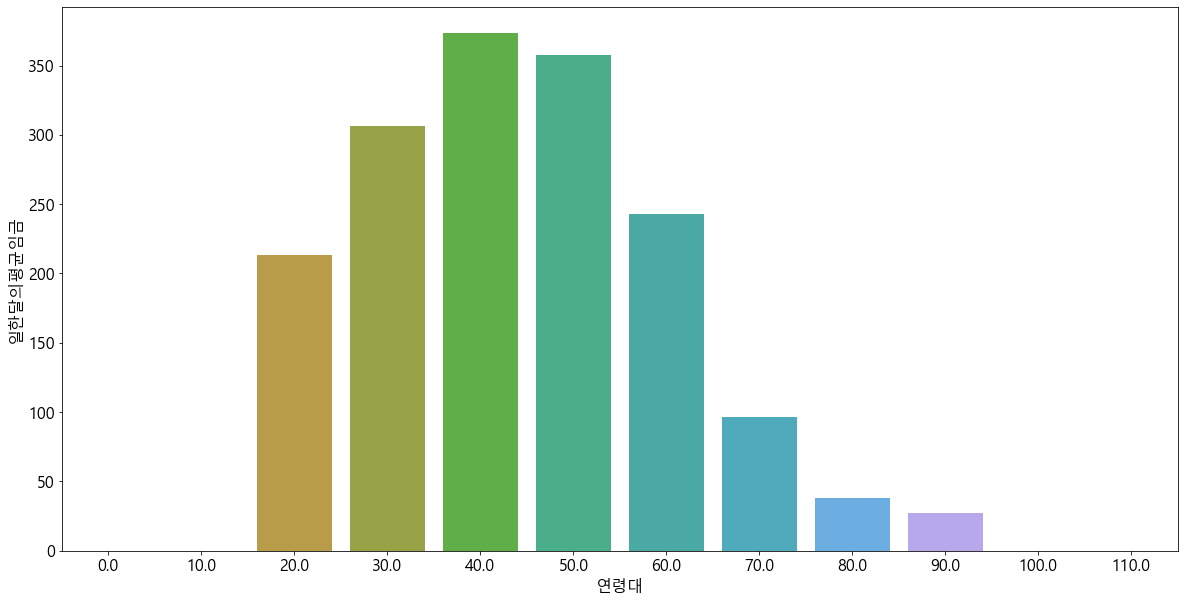

In [65]:
# 시각화
a2.reset_index(inplace=True)
sns.barplot(data=a2, x='연령대', y='일한달의평균임금')
plt.show()

### 연령별 평균 임금을 구해 시각화한다.

In [66]:
# 나이와 일한달의평균임금을 가져온다.
a1 = df2[['나이', '일한달의평균임금']]
a1

,나이,일한달의평균임금
0,77.0,NaN
1,74.0,165.0
2,80.0,NaN
3,60.0,366.0
4,59.0,190.0
...,...,...
13139,75.0,NaN
13140,75.0,NaN
13141,89.0,NaN
13142,86.0,NaN


In [67]:
# 나이를 기준으로 그룹 묶고 평균 임금을 구한다.
a2 = a1.groupby('나이').mean()
a2

,일한달의평균임금
나이,
2.0,NaN
3.0,NaN
4.0,NaN
5.0,NaN
6.0,NaN
...,...
101.0,NaN
102.0,NaN
103.0,NaN


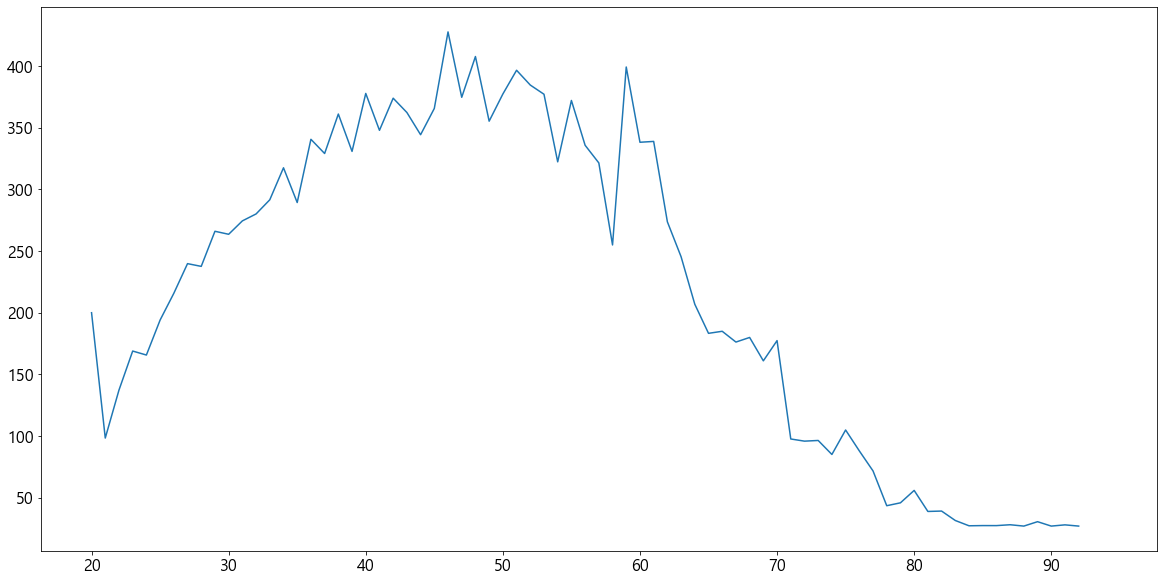

In [68]:
# matplotlib
# 지정해준 데이터 순서대로 점을찍어 선을 그린다.
# 인덱스를 정렬한다.
a2.sort_index(inplace=True)
plt.plot(a2.index, a2.values)
plt.show()

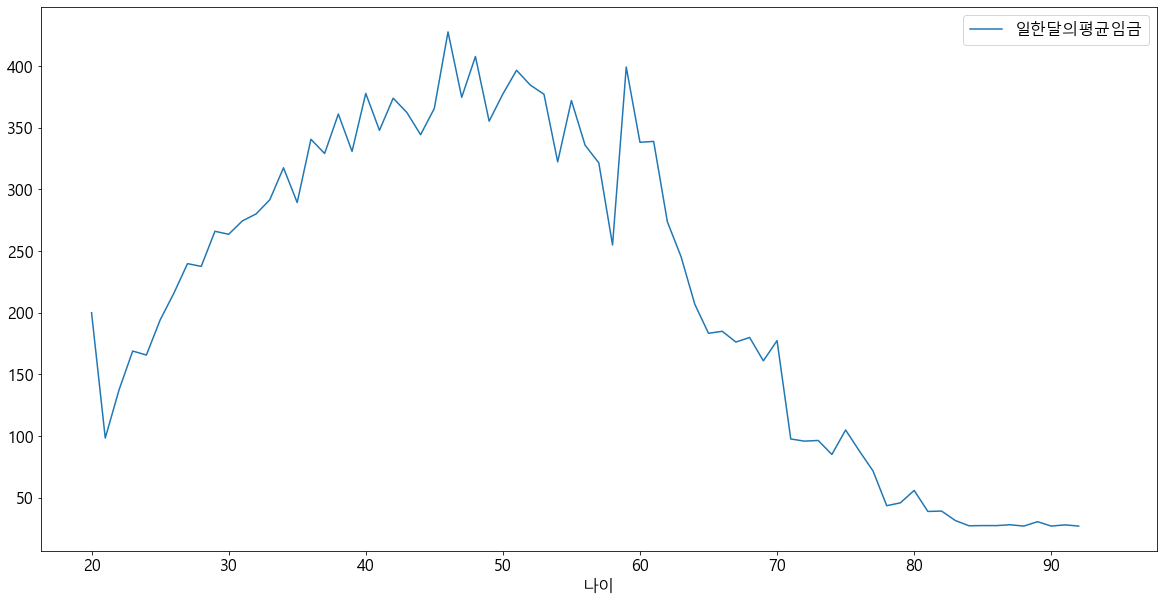

In [69]:
# dataframe
# index가 x축이되고 값이 y축이 된다.
a2.plot()
plt.show()

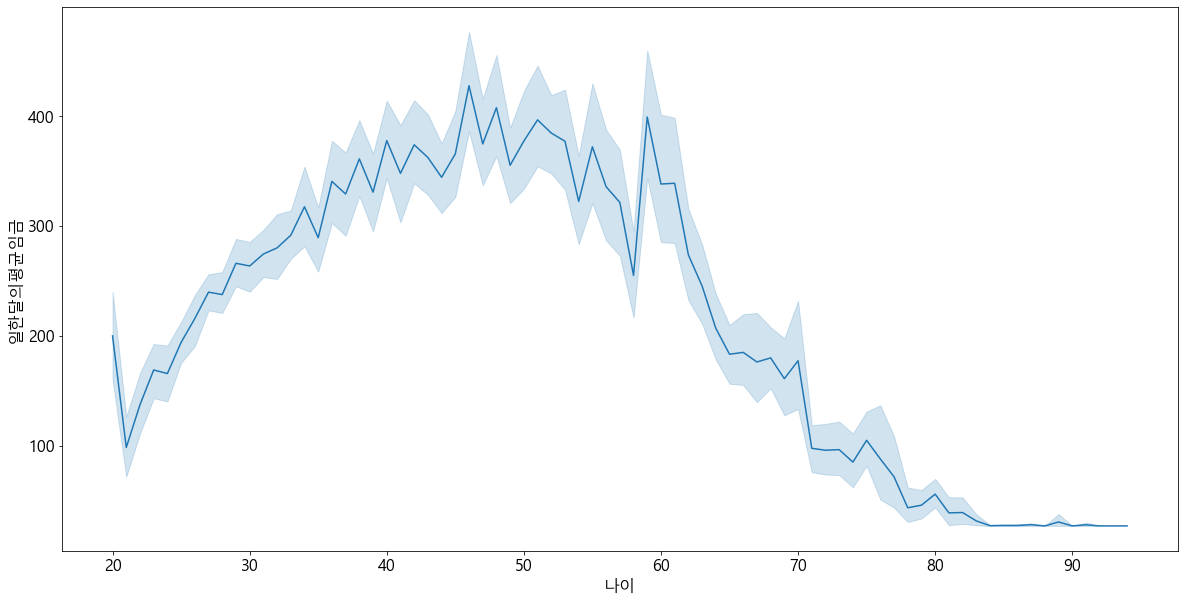

In [72]:
# seaborn
# 인덱스를 리셋한다.
sns.lineplot(data=df2, x='나이', y='일한달의평균임금')
plt.show()

- 가운데 굵은 선은 평균을 표시한다.
- 선을 둘러싸고있는 옅은 곳은 최대와 최소를 표시해준다.

### 종교 유무에 따른 이혼율을 시각화 한다.

In [84]:
# 필요한 것만 가져온다.
a1 = df2[['종교유무', '혼인상태', '나이']]

In [85]:
# 이혼이 아닌 사람들의 데이터를 이혼아님으로 변경한다.
idx1 = a1.query('혼인상태 != "이혼"').index
a1.loc[idx1,'혼인상태'] = '이혼아님'
a1

,종교유무,혼인상태,나이
0,없음,이혼아님,77.0
1,없음,이혼아님,74.0
2,있음,이혼,80.0
3,있음,이혼아님,60.0
4,있음,이혼아님,59.0
...,...,...,...
13139,없음,이혼아님,75.0
13140,없음,이혼아님,75.0
13141,없음,이혼아님,89.0
13142,없음,이혼아님,86.0


In [86]:
a1

,종교유무,혼인상태,나이
0,없음,이혼아님,77.0
1,없음,이혼아님,74.0
2,있음,이혼,80.0
3,있음,이혼아님,60.0
4,있음,이혼아님,59.0
...,...,...,...
13139,없음,이혼아님,75.0
13140,없음,이혼아님,75.0
13141,없음,이혼아님,89.0
13142,없음,이혼아님,86.0


In [90]:
a2 = a1.groupby(['종교유무', '혼인상태']).count()
a2

나이
종교유무 혼인상태      
없음   이혼     417
     이혼아님  7059
있음   이혼     270
     이혼아님  5398

In [88]:
a1.groupby(['혼인상태','종교유무']).count()

나이
혼인상태 종교유무      
이혼   없음     417
     있음     270
이혼아님 없음    7059
     있음    5398

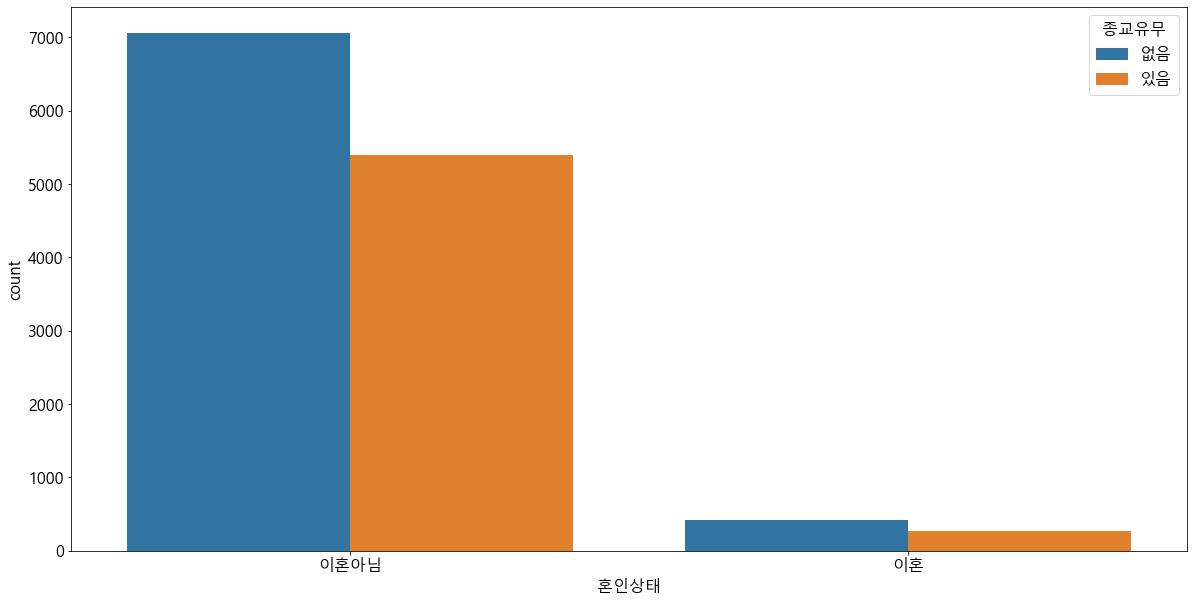

In [112]:
sns.countplot(data=a1, x='혼인상태', hue='종교유무')
plt.show()

In [121]:
# 종교가 있는 사람과 없는 사람의 데이터를 가져온다.
m1 = a2.loc['있음']
m2 = a2.loc['없음']
m1.columns = ['사람수']
m2.columns = ['사람수']
display(m1)
display(m2)

,사람수
혼인상태,
이혼,270
이혼아님,5398


,사람수
혼인상태,
이혼,417
이혼아님,7059


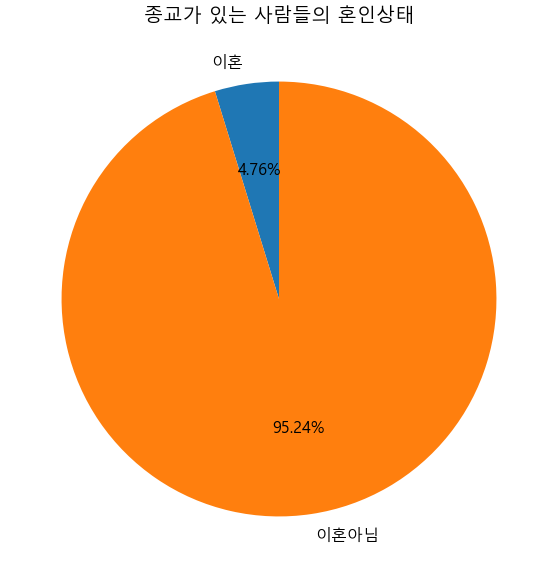

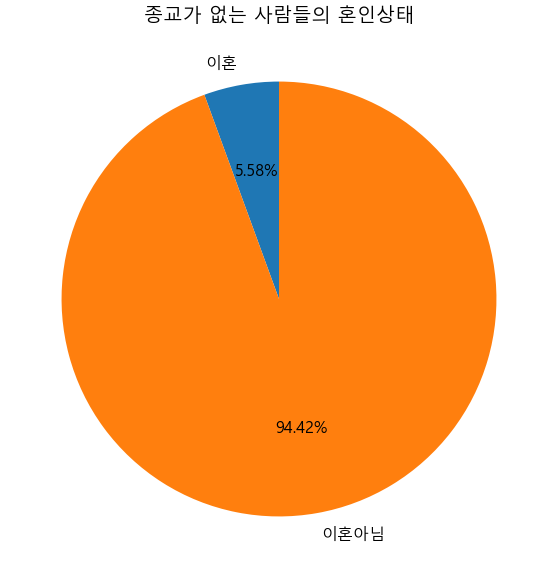

In [131]:
# 첫 번째 pie 그래프
v1 = m1['사람수']
i1 = m1.index
plt.pie(v1, labels=i1, autopct='%.2f%%', startangle=90)
plt.title('종교가 있는 사람들의 혼인상태')
plt.show()

# 두 번째 pie 그래프
v2 = m2['사람수']
i2 = m2.index
plt.pie(v2, labels=i2, autopct='%.2f%%', startangle=90)
plt.title('종교가 없는 사람들의 혼인상태')
plt.show()

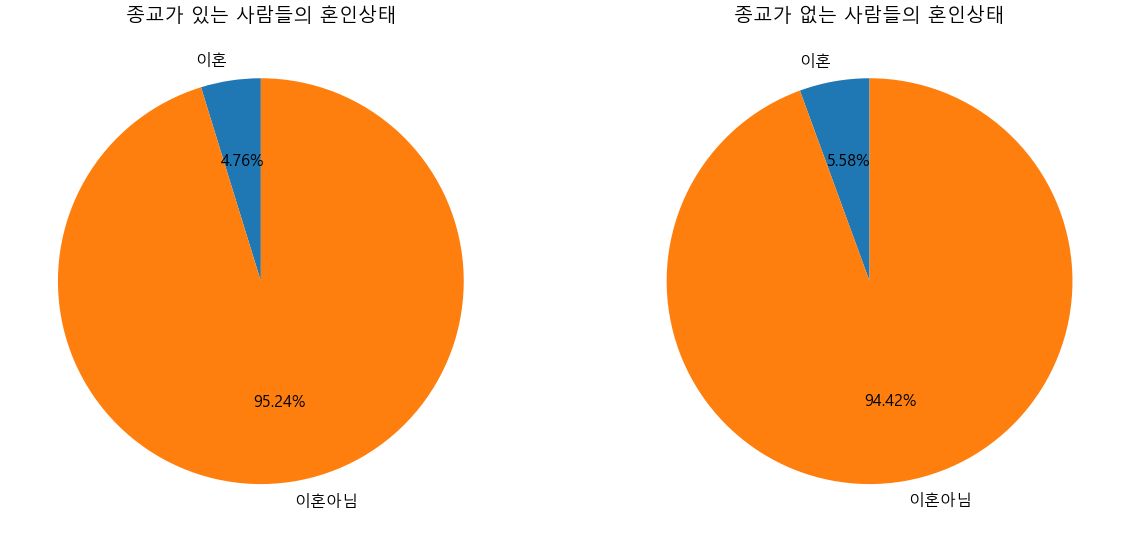

In [137]:
# 첫 번째 pie 그래프
v1 = m1['사람수']
i1 = m1.index
# 그려질 그래프의 위치를 설정한다.
# (행의 개수, 열의 개수, 그래프의 순서(1부터 시작))
plt.subplot(1,2,1)
plt.pie(v1, labels=i1, autopct='%.2f%%', startangle=90)
plt.title('종교가 있는 사람들의 혼인상태')

# 두 번째 pie 그래프
v2 = m2['사람수']
i2 = m2.index
plt.subplot(1,2,2)
plt.pie(v2, labels=i2, autopct='%.2f%%', startangle=90)
plt.title('종교가 없는 사람들의 혼인상태')
plt.show()

### 각 권역별 평균 임금을 구해 시각화 한다.

In [148]:
a2 = df2[['7개권역', '일한달의평균임금']].groupby('7개권역').mean()
a2.reset_index(inplace=True)
a2.sort_values(by='일한달의평균임금', ascending=False, inplace=True)
a2

,7개권역,일한달의평균임금
5,서울,302.565957
3,대전/충남,302.200521
6,수도권(인천/경기),295.311632
4,부산/경남/울산,289.095168
0,강원/충북,274.597360
2,대구/경북,253.423888
1,광주/전남/전북/제주도,250.670713


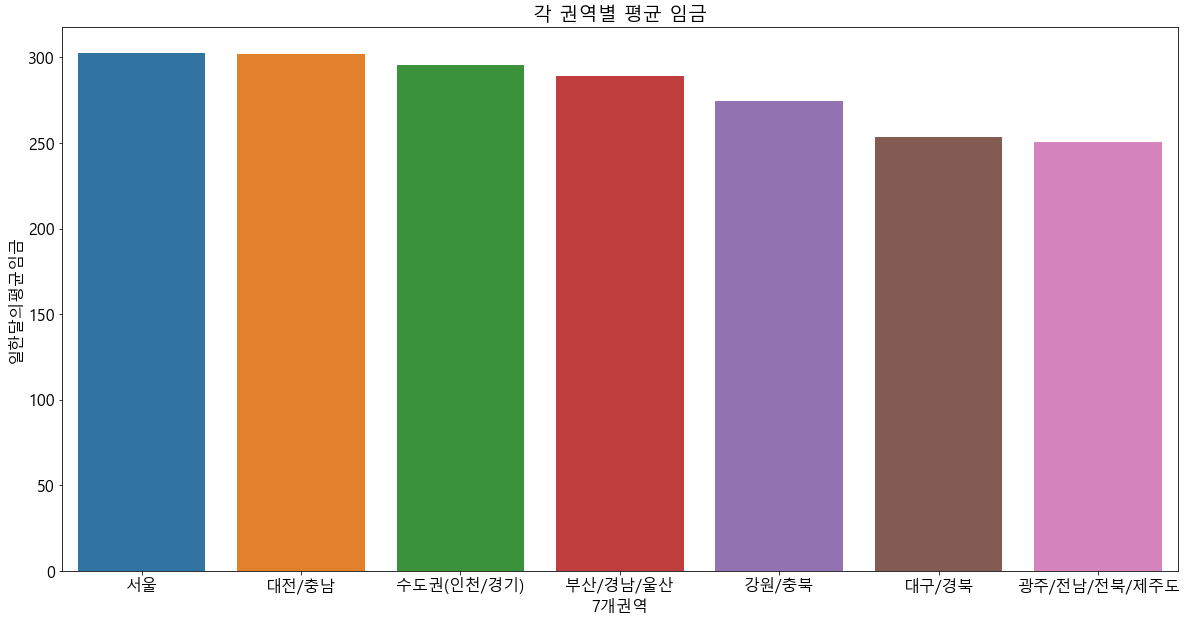

In [152]:
sns.barplot(data=a2, x='7개권역', y='일한달의평균임금')
plt.title('각 권역별 평균 임금')
plt.show()

### 직종 대분류별 평균 임금을 구해 시각화 한다.

In [154]:
# 필요한 데이터를 가져온다.
a1 = df2[['직종대분류', '일한달의평균임금']]
a1

,직종대분류,일한달의평균임금
0,NaN,NaN
1,단순노무 종사자,165.0
2,기능원 및 관련 기능 종사자,NaN
3,"장치, 기계, 조작 및 조립 종사자",366.0
4,사무 종사자,190.0
...,...,...
13139,NaN,NaN
13140,NaN,NaN
13141,NaN,NaN
13142,"농립, 어업 숙련 종사자",NaN


In [159]:
# 직종 대분류를 기준으로 그룹으로 묶고 평균을 구한다.
a2 = a1.groupby('직종대분류').mean()
a2.reset_index(inplace=True)
a2.sort_values(by='일한달의평균임금', ascending=False, inplace=True)
a2

,직종대분류,일한달의평균임금
0,관리자,491.832215
1,군인,451.818182
5,사무 종사자,369.237515
8,전문가 및 관련 종사자,352.306072
2,기능원 및 관련 기능 종사자,348.522013
7,"장치, 기계, 조작 및 조립 종사자",331.075802
9,판매 종사자,286.104478
3,"농립, 어업 숙련 종사자",214.062500
6,서비스 종사자,202.494331
4,단순노무 종사자,141.085106


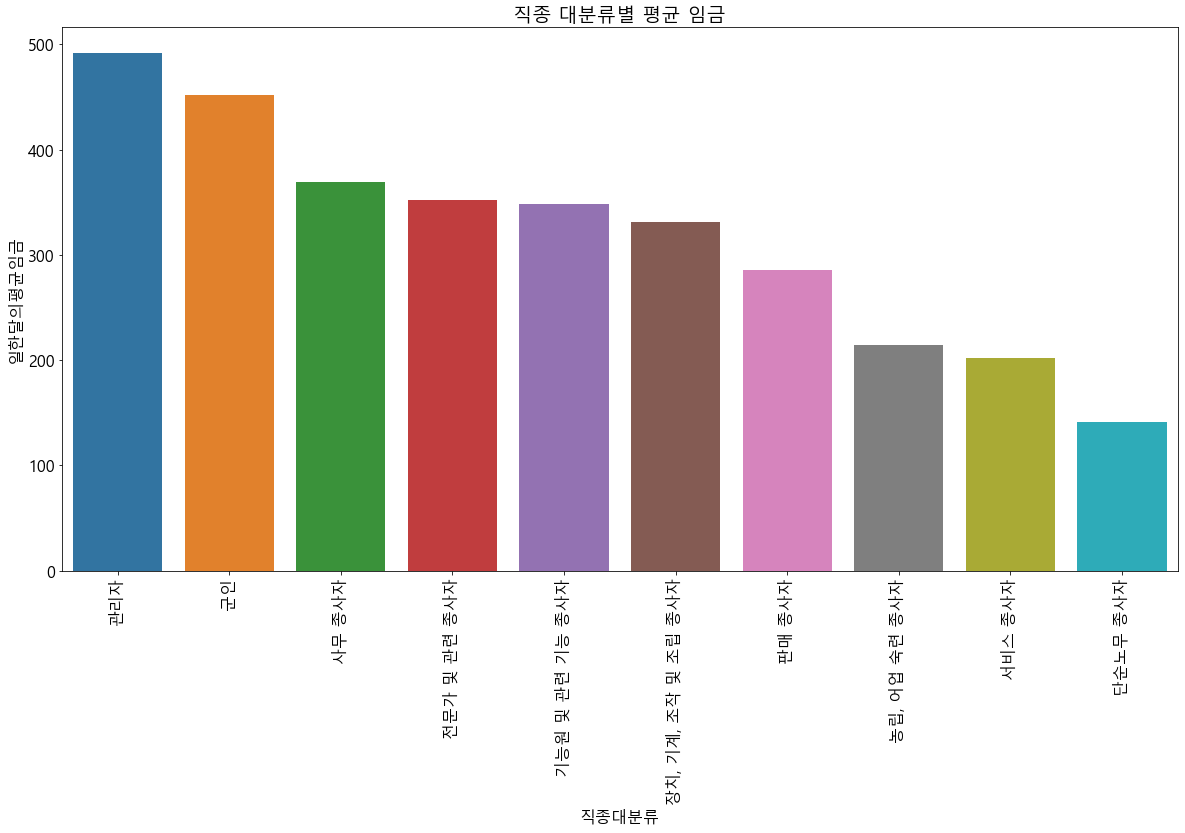

In [162]:
sns.barplot(data=a2, x='직종대분류', y='일한달의평균임금')
plt.title('직종 대분류별 평균 임금')
plt.xticks(rotation=90)
plt.show()